In [1]:
## Importing packages and modules

import pandas as pd
import os
import matplotlib.pyplot as plt

#data
test_data = os.path.join('data', 'BRCA_minimal_60x19.gct')
large_data = os.path.join('data', 'BRCA_large_20783x40.gct')

## Question 1
Write a Python function with the following functional spec:
Inputs:
- a GenePattern GCT file
- An optional summary parameter, boolean. 
Output: a Pandas DataFrame containing the contents of the input file



In [2]:
def read_gct(GCT_file, summary = False):
    """
    Reads a GCT data file and outputs a Pandas dataframe.
    
    GCT_file(string) --> filepath to GCT dataset
    summary(boolean) --> if true, print rows and columns of GCT file
    
    returns a Pandas dataframe
    """
    data = pd.read_csv(GCT_file, delimiter = "\t")
    if summary == True:
        print("Data has: %d rows and %d columns"%(len(data), len(data.loc[0])))
    return data

## Question 2a
Use the function you wrote in #1 to read this file and print the summary: https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct


In [3]:
small_data = read_gct(test_data, True)

Data has: 60 rows and 21 columns


## Question 2b
Use that same function to read this file (without setting a value of the parameter summary in your function call): https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct


In [4]:
big_data = read_gct(large_data)

## Question 3
Using the data in the DataFrame from #2b, plot a histogram for each of the following columns. You can use the matplotlib package or any other plotting package you are familiar with.
- A7-A0DB-normal
- A7-A13E-normal
- BH-A0B3-primary
- BH-A0B5-primary


<AxesSubplot:title={'center':'A7-A0DB-normal'}, ylabel='Frequency'>

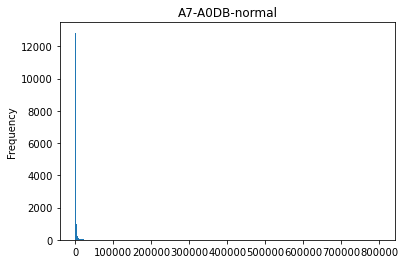

In [5]:
cols = "A7-A0DB-normal,A7-A13E-normal,BH-A0B3-primary,BH-A0B5-primary".split(",")
subset = big_data[cols]
big_data[cols[0]].plot.hist(bins = 1000, title = cols[0])

<AxesSubplot:title={'center':'A7-A13E-normal'}, ylabel='Frequency'>

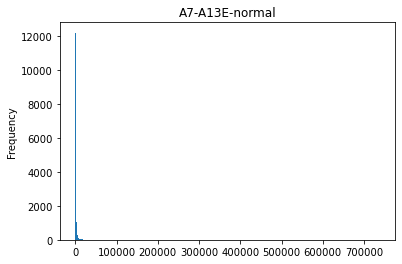

In [6]:
big_data[cols[1]].plot.hist(bins = 1000, title = cols[1])

<AxesSubplot:title={'center':'BH-A0B3-primary'}, ylabel='Frequency'>

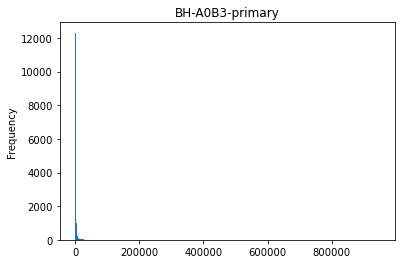

In [7]:
big_data[cols[2]].plot.hist(bins = 1000, title = cols[2])

<AxesSubplot:title={'center':'BH-A0B5-primary'}, ylabel='Frequency'>

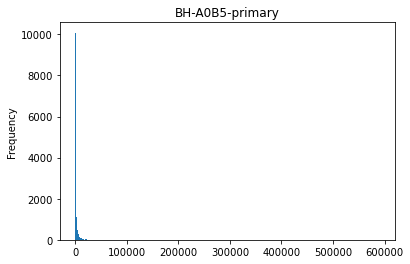

In [8]:
big_data[cols[3]].plot.hist(bins = 1000, title = cols[3])

## Question 4
Using the data in the DataFrame from #2b, print out a DataFrame containing one row for each sample, with the following columns computed:
- Sample name
- Mean
- Median
- Standard deviation



In [9]:
def stats(x):
    """
    obtains descriptive statistics of a row of genetic data 
    (used as apply function)
    x --> row in pandas dataframe
    
    returns a list of the mean, median, and standard deviation of that row
    """
    return([x.mean(), x.median(), x.std()])

def get_stats(big_data):
    """
    applys stats to each row of genetic data
    
    big_data --> pandas dataframe containing genetic data
    
    returns a pandas dataframe where each row shows the mean, median, and standard deviation of a sample. 
    """
    subset = big_data.T.iloc[2:]
    out = pd.DataFrame(subset.apply(stats, axis = 1).tolist(),
            columns = ["Mean","Median", "Standard_Deviation"])
    out["Name"] = subset.index
    out = out[["Name", "Mean","Median", "Standard_Deviation"]]
    return out
get_stats(big_data)



,Name,Mean,Median,Standard_Deviation
0,A7-A0CE-normal,3308.877255,814.0,12725.531516
1,A7-A0CH-normal,3046.316942,630.0,14145.451194
2,A7-A0D9-normal,2628.131550,350.0,17827.391513
3,A7-A0DB-normal,2354.674445,362.0,13973.914409
4,A7-A13E-normal,2380.702593,427.0,13373.496798
5,A7-A13F-normal,2493.380215,527.0,12477.592390
6,A7-A13G-normal,3509.542463,454.0,30474.663592
7,AC-A23H-normal,3396.675312,659.0,20073.855034
8,AC-A2FB-normal,3675.583169,792.0,15577.976864
9,AC-A2FF-normal,3743.660492,935.0,14827.012985


## Question 5a
Using the data in the DataFrame from #2b, filter out (remove) the 10% most variable rows based on their standard deviations (e.g., if the DataFrame had 100 rows, you would remove the 10 rows with the highest standard deviation).

In [10]:
def custom_filter(data_df):
    """
    a custom filter that filters out 10% most variable rows based on standard deviations
    
    data_df --> original data
    returs filtered data
    """
    # get top 10% of standard deviation
    
    std = data_df[data_df.columns[2:]].std(axis = 1)
    ten = len(std)//10 * 9 
    top_ten = sorted(std)[ten:]
    

    return data_df[~std.isin(top_ten)].reset_index(drop = True)

custom_filter(big_data)

,Name,Description,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,...,AC-A2FM-primary,BH-A0AU-primary,BH-A0AY-primary,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary
0,TSPAN6,tetraspanin 6,5404.0,5030.0,3616.0,2425.0,3400.0,3276.0,4611.0,7362.0,...,453.0,1390.0,2418.0,1946.0,2498.0,2709.0,3701.0,2390.0,6725.0,1173.0
1,TNMD,tenomodulin,320.0,2116.0,3616.0,304.0,992.0,2159.0,869.0,234.0,...,74.0,50.0,62.0,54.0,20.0,20.0,88.0,38.0,113.0,92.0
2,DPM1,dolichyl-phosphate mannosyltransferase subunit...,2472.0,1611.0,1254.0,1137.0,1242.0,1295.0,1896.0,1813.0,...,2381.0,2143.0,1675.0,1235.0,1853.0,1739.0,2172.0,1391.0,3203.0,1709.0
3,SCYL3,SCY1 like pseudokinase 3,1483.0,1154.0,820.0,687.0,931.0,1178.0,1262.0,1684.0,...,1759.0,1676.0,1460.0,1705.0,1168.0,3469.0,2544.0,1274.0,4205.0,1687.0
4,C1orf112,chromosome 1 open reading frame 112,312.0,252.0,225.0,241.0,259.0,277.0,256.0,390.0,...,629.0,618.0,406.0,354.0,1166.0,2086.0,325.0,462.0,2162.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,HCP5B,HLA complex P5B (non-protein coding),20.0,20.0,20.0,20.0,20.0,25.0,22.0,25.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
18698,SPRY4-IT1,SPRY4 intronic transcript 1,20.0,20.0,27.0,24.0,30.0,32.0,41.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,36.0,20.0,20.0,20.0
18699,AC018638.8,NaN,27.0,20.0,37.0,78.0,44.0,75.0,139.0,99.0,...,36.0,33.0,20.0,23.0,20.0,104.0,28.0,25.0,103.0,21.0
18700,LINC02246,long intergenic non-protein coding RNA 2246,20.0,20.0,20.0,20.0,20.0,21.0,73.0,27.0,...,31.0,20.0,20.0,20.0,20.0,30.0,20.0,20.0,89.0,91.0


## Question 5b
What are the mean and median of each column after applying this filter? Plot the histograms of the same 4 columns from question #3.

In [11]:
# mean and median of each sample
filtered_data = custom_filter(big_data)
filtered_stats = get_stats(filtered_data)
filtered_stats

,Name,Mean,Median,Standard_Deviation
0,A7-A0CE-normal,1483.540530,566.0,2030.554976
1,A7-A0CH-normal,1226.425783,440.0,1750.154416
2,A7-A0D9-normal,958.635761,245.0,1565.351443
3,A7-A0DB-normal,914.542188,256.0,1431.471646
4,A7-A13E-normal,951.020372,296.0,1440.362169
5,A7-A13F-normal,1040.634157,372.0,1487.175980
6,A7-A13G-normal,1281.384237,320.0,2131.515907
7,AC-A23H-normal,1381.112020,460.0,2067.590557
8,AC-A2FB-normal,1550.230510,553.5,2210.880860
9,AC-A2FF-normal,1737.350283,667.0,2409.027770


<AxesSubplot:title={'center':'A7-A0DB-normal'}, ylabel='Frequency'>

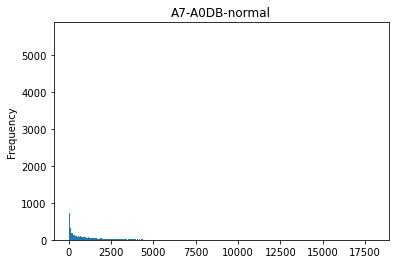

In [12]:
# reduced bin size to show more information

filtered_data[cols[0]].plot.hist(bins = 1000, title = cols[0])

<AxesSubplot:title={'center':'A7-A13E-normal'}, ylabel='Frequency'>

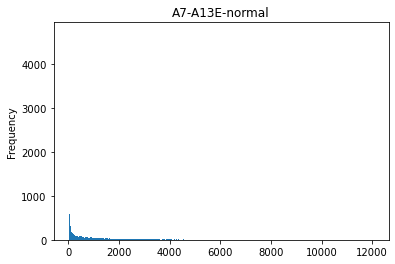

In [13]:
filtered_data[cols[1]].plot.hist(bins = 1000, title = cols[1])

<AxesSubplot:title={'center':'BH-A0B3-primary'}, ylabel='Frequency'>

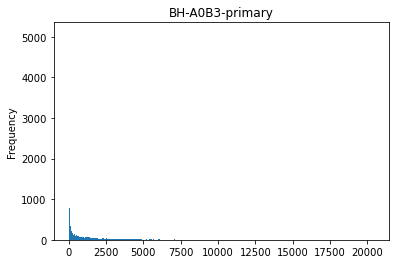

In [14]:
filtered_data[cols[2]].plot.hist(bins = 1000, title = cols[2])

<AxesSubplot:title={'center':'BH-A0B5-primary'}, ylabel='Frequency'>

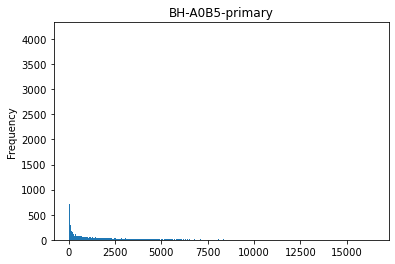

In [15]:
filtered_data[cols[3]].plot.hist(bins = 1000, title = cols[3])